In [60]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# construct a list 'classes' to store all classes
classes = ['aeroplane','bicycle','bird','boat','bottle','bus','car','cat','chair','cow',\
           'diningtable','dog','horse','motorbike','person','pottedplant','sheep','sofa','train','tvmonitor']
# load all data to an ndarray 'data'
data = np.loadtxt('voc12/'+classes[0]+'_trainval.txt')
for classesi in classes[1:20]:
    temp = np.loadtxt('voc12/'+classesi+'_trainval.txt')
    data = np.concatenate((data,temp),axis=1)
# delete the repeated columns in 'data'
didx = list(range(0,40,2))
data = np.delete(data,didx,axis=1)
idx = np.arange(11540).reshape(11540,1) # add indices to each image
data = np.concatenate((idx,data),axis=1)
data[0:10]
# data.shape

array([[ 0., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1.,  1.],
       [ 1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1.,  1., -1., -1., -1.,  1., -1.],
       [ 2., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1.],
       [ 3., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
         1., -1.,  1., -1., -1., -1., -1., -1.],
       [ 4., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1.],
       [ 5., -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1.],
       [ 6., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1.,  1.],
       [ 7., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,
        -1., -1., -1., -1., -1., -1., -1., -1.],
       [ 8.,  1., -1., -

In [3]:
# compute the number of positive samples for each class
data[data==-1] = 0 
nclasses = np.sum(data,axis=0)
nclassdict = dict(zip(classes,nclasses[1:21]))
nclassdict

{'aeroplane': 670.0,
 'bicycle': 552.0,
 'bird': 765.0,
 'boat': 508.0,
 'bottle': 706.0,
 'bus': 421.0,
 'car': 1161.0,
 'cat': 1080.0,
 'chair': 1119.0,
 'cow': 303.0,
 'diningtable': 538.0,
 'dog': 1286.0,
 'horse': 482.0,
 'motorbike': 526.0,
 'person': 4087.0,
 'pottedplant': 527.0,
 'sheep': 325.0,
 'sofa': 507.0,
 'train': 544.0,
 'tvmonitor': 575.0}

In [4]:
# reorder the dictionary according to the number of items
nclassdict0 = sorted(nclassdict.items(), reverse=True, key=lambda item:item[1])
nclassdict0
# type(nclassdict0)

[('person', 4087.0),
 ('dog', 1286.0),
 ('car', 1161.0),
 ('chair', 1119.0),
 ('cat', 1080.0),
 ('bird', 765.0),
 ('bottle', 706.0),
 ('aeroplane', 670.0),
 ('tvmonitor', 575.0),
 ('bicycle', 552.0),
 ('train', 544.0),
 ('diningtable', 538.0),
 ('pottedplant', 527.0),
 ('motorbike', 526.0),
 ('boat', 508.0),
 ('sofa', 507.0),
 ('horse', 482.0),
 ('bus', 421.0),
 ('sheep', 325.0),
 ('cow', 303.0)]

In [56]:
classidx = []
coverage = 0
for value in nclassdict0:
    classidx.append(classes.index(value[0]))
    coverage += value[1]
print(classidx)
print(coverage)

[14, 11, 6, 8, 7, 2, 4, 0, 19, 1, 18, 10, 15, 13, 3, 17, 12, 5, 16, 9]
16682.0


In [6]:
data.shape

(11540, 21)

In [7]:
data_labels = data[:,1:]

In [8]:
reorder_data_labels = data_labels[:, classidx]

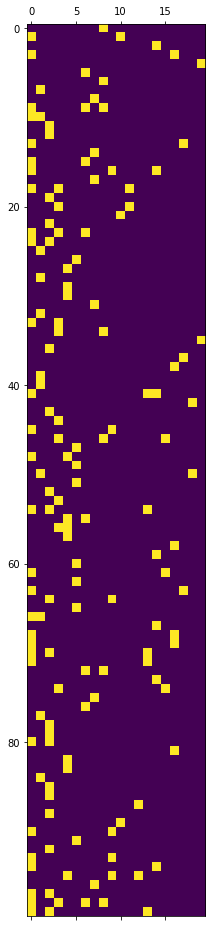

In [21]:
plt.matshow(reorder_data_labels[0:100])

In [22]:
sum(reorder_data_labels[:,1])

1286.0

In [31]:
weighted_reorder_data_labels = np.empty_like(reorder_data_labels)
for cls_idx in range(20):
    weighted_reorder_data_labels[:, cls_idx:cls_idx+1] = reorder_data_labels[:, cls_idx:cls_idx+1] * 2**cls_idx

In [44]:
sort_idx= np.argsort(weighted_reorder_data_labels.sum(axis=1))

In [46]:
sort_reorder_data_labels = reorder_data_labels[sort_idx,:]

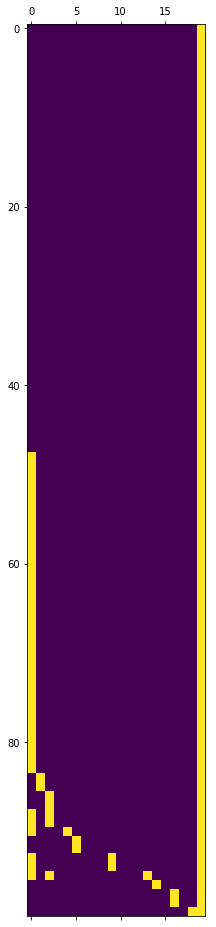

In [61]:
plt.matshow(sort_reorder_data_labels[-100:])

In [62]:
cv2.imwrite('sort_reorder_data_labels.png', sort_reorder_data_labels)

True

In [13]:
# import the name/index of each image
data0 = []
with open('./voc12/trainval.txt', 'r') as file:
    datatemp = file.readlines()  
    for line in datatemp:
        linei = line.split()
        data0.append(linei)
data0[0:10]
# type(data0)

[['2008_000002'],
 ['2008_000003'],
 ['2008_000007'],
 ['2008_000008'],
 ['2008_000009'],
 ['2008_000015'],
 ['2008_000016'],
 ['2008_000019'],
 ['2008_000021'],
 ['2008_000023']]

In [48]:
datadict = dict(zip(data0,idx))

TypeError: unhashable type: 'list'